In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

     |████████████████████████████████| 358kB 5.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=8d9a6c7731a48a13e9d754565d7ba0a1fd06317a01c7018a2ecb34c1d6e5d2e0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 276kB 5.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=ecac0db8cab6b6a44a5e431a76b6fcd29b44ca73f1df6308dbd54acd19a3e78d
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 112kB 6.0MB/s 


In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
df = pd.DataFrame(data, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'valve'])

In [ ]:
df = df.fillna(method='ffill')
df.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,valve
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,100
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,100
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150,100
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,100
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,100


In [ ]:
df['valve'].unique()

array([100,  73,  80,  90])

In [ ]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#test_y = le.fit_transform(test_y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 4)
y_test = keras.utils.to_categorical(y_test, num_classes = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
56/56 [==============================] - 1s 881us/step - loss: 1.3467 - accuracy: 0.4256
Epoch 2/200
56/56 [==============================] - 0s 864us/step - loss: 1.2682 - accuracy: 0.5057
Epoch 3/200
56/56 [==============================] - 0s 822us/step - loss: 1.2333 - accuracy: 0.5183
Epoch 4/200
56/56 [==============================] - 0s 1ms/step - loss: 1.2227 - accuracy: 0.4994
Epoch 5/200
56/56 [==============================] - 0s 1ms/step - loss: 1.1938 - accuracy: 0.5173
Epoch 6/200
56/56 [==============================] - 0s 1ms/step - loss: 1.1785 - accuracy: 0.5215
Epoch 7/200
56/56 [==============================] - 0s 1ms/step - loss: 1.1621 - accuracy: 0.5262
Epoch 8/200
56/56 [==============================] - 0s 933us/step - loss: 1.1789 - accuracy: 0.5079
Epoch 9/200
56/56 [==============================] - 0s 996us/step - loss: 1.1600 - accuracy: 0.5125
Epoch 10/200
56/56 [==============================] - 0s 1ms/step - loss: 1.1469 - accuracy: 0.5197

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)

Test score: 0.9355047345161438
Test accuracy: 0.6099773049354553


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring='neg_mean_squared_error').fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0655 ± 0.0029,SE1
0.0582 ± 0.0056,PS1
0.0490 ± 0.0026,FS2
0.0302 ± 0.0025,VS1
0.0281 ± 0.0025,CE1
0.0256 ± 0.0020,PS4
0.0245 ± 0.0026,TS1
0.0220 ± 0.0009,CP1
0.0146 ± 0.0020,PS5
0.0092 ± 0.0022,P1


Feature: 0, Score: 0.05939
Feature: 1, Score: 0.00867
Feature: 2, Score: 0.02594
Feature: 3, Score: 0.01414
Feature: 4, Score: 0.00863
Feature: 5, Score: 0.05030
Feature: 6, Score: 0.02550
Feature: 7, Score: 0.00844
Feature: 8, Score: 0.03121
Feature: 9, Score: 0.02765
Feature: 10, Score: 0.02109
Feature: 11, Score: 0.06373


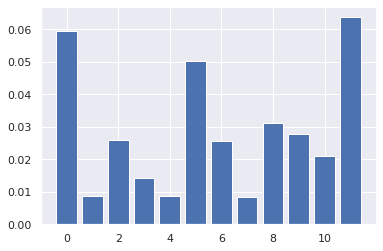

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61        72
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        72
           3       0.63      0.97      0.77       225

    accuracy                           0.61       441
   macro avg       0.29      0.42      0.34       441
weighted avg       0.41      0.61      0.49       441

[[ 50   0   1  21]
 [ 28   0   1  43]
 [  9   0   0  63]
 [  6   0   0 219]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("valve.h5") 

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth =5 ,  
                                  min_samples_split = 2, # Max Height of Tree
                                  min_samples_leaf = 1,              # Maximum Leaf samples
                                  random_state = 100)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)  

print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(y_test, y_pred_gini))
text_representation = tree.export_text(clf_gini, feature_names=X.columns.tolist())
print(text_representation)
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for feature_names,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (feature_names,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, tick_label= X.columns)
pyplot.show()

Accuracy :  62.585034013605444
Report :                precision    recall  f1-score   support

          73       0.41      0.93      0.57        72
          80       0.68      0.21      0.32        72
          90       0.46      0.08      0.14        72
         100       0.78      0.84      0.81       225

    accuracy                           0.63       441
   macro avg       0.58      0.51      0.46       441
weighted avg       0.65      0.63      0.58       441

|--- SE1 <= 58.82
|   |--- SE1 <= 29.91
|   |   |--- PS1 <= 172.87
|   |   |   |--- class: 80
|   |   |--- PS1 >  172.87
|   |   |   |--- SE1 <= 23.70
|   |   |   |   |--- PS1 <= 180.58
|   |   |   |   |   |--- class: 90
|   |   |   |   |--- PS1 >  180.58
|   |   |   |   |   |--- class: 73
|   |   |   |--- SE1 >  23.70
|   |   |   |   |--- VS1 <= 0.75
|   |   |   |   |   |--- class: 73
|   |   |   |   |--- VS1 >  0.75
|   |   |   |   |   |--- class: 73
|   |--- SE1 >  29.91
|   |   |--- PS5 <= 9.95
|   |   |   |--- FS1

Weight,Feature
145.5189 ± 16.8176,SE1
94.6212 ± 9.4380,FS1
23.8817 ± 6.5424,PS5
11.6594 ± 1.0369,PS1
6.2018 ± 0.6900,TS1
0 ± 0.0000,CP1
0 ± 0.0000,CE1
0 ± 0.0000,VS1
0 ± 0.0000,P1
0 ± 0.0000,FS2
